# CAPSTONE PROJECT
 ### Promoting my newest beer in Belgium
###### If we want to promote our new beer in Belgium, in what location should we start ?

PART 1

* Built a dataframe of all the Belgium City's by web scraping the data ( Wikipedia)
* Get the Longitude and Latitude and Population per city 
* Retreive venue data for every City center from Foursquare API
* Select the City with the most pubs to Explore

PART 2 

* Built a datafram of the best City to promote the new beer
* Get the Longitude and Latitude per Neighbourhood
* Retreive Venue data for every Neighbourhood with Foursquare API
* Explore the data and cluster the Neighbourhoods
* Find out what neighbourhood is the best to promote your new beer




# Part 1

### 1. Import Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup as bs

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Done importing')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

### 2. Get The City Data From Wikipedia and put it into a DataFrame

In [3]:
#reading table from wikipedia page
Belgium_df = pd.read_html("https://nl.wikipedia.org/wiki/Lijst_van_steden_in_Belgi%C3%AB", header=0, attrs={"class":"wikitable sortable"})[0]
Belgium_df.head(20)

,Stad,Arrondissement,Provincie,Gewest,Inwoners (2013)[1],Franse naam[2],Jaar Koninklijk Besluit,Jaar stadsrechten
0,Aalst,Aalst,Oost-Vlaanderen,Vlaanderen,82.587,Alost,1825,1174
1,Aarlen,Aarlen,Luxemburg,Wallonië,28.520,Arlon,1825,NaN
2,Aarschot,Leuven,Vlaams-Brabant,Vlaanderen,28.969,NaN,1825,1194
3,Aat,Aat,Henegouwen,Wallonië,28.463,Ath,1825,1166
4,Andenne,Namen,Namen,Wallonië,25.795,NaN,1825,NaN
5,Antoing,Doornik,Henegouwen,Wallonië,7.693,NaN,1825,1817 (titel)
6,Antwerpen,Antwerpen,Antwerpen,Vlaanderen,507.911,Anvers,1825,1221
7,Aubange,Aarlen,Luxemburg,Wallonië,16 856,Arlon,2018,NaN
8,Bastenaken,Bastenaken,Luxemburg,Wallonië,15.230,Bastogne,1825,1332
9,Beaumont,Thuin,Henegouwen,Wallonië,7.053,NaN,1825,NaN


#### 2.1 Clean the data

In [8]:
Belgium_df = Belgium_df.drop(['Jaar Koninklijk Besluit','Jaar stadsrechten'], axis=1 )
Belgium_df.rename(columns={'Inwoners (2013)[1]': 'inwoners'}, inplace=True)
Belgium_df.rename(columns={'Franse naam[2]': 'frans'}, inplace=True)
Belgium_df.head()

,Stad,Arrondissement,Provincie,Gewest,inwoners,frans
0,Aalst,Aalst,Oost-Vlaanderen,Vlaanderen,82.587,Alost
1,Aarlen,Aarlen,Luxemburg,Wallonië,28.520,Arlon
2,Aarschot,Leuven,Vlaams-Brabant,Vlaanderen,28.969,NaN
3,Aat,Aat,Henegouwen,Wallonië,28.463,Ath
4,Andenne,Namen,Namen,Wallonië,25.795,NaN


In [9]:
Belgium_df = Belgium_df.drop(['frans','Gewest', 'Arrondissement' , 'Provincie'], axis=1 )

In [10]:
Belgium_df.rename(columns={'Stad': 'City'}, inplace=True)
Belgium_df.rename(columns={'inwoners': 'Population'}, inplace=True)
#Belgium_df.set_index('City', inplace=True)
Belgium_df.head(20)

,City,Population
0,Aalst,82.587
1,Aarlen,28.520
2,Aarschot,28.969
3,Aat,28.463
4,Andenne,25.795
5,Antoing,7.693
6,Antwerpen,507.911
7,Aubange,16 856
8,Bastenaken,15.230
9,Beaumont,7.053


In [11]:
Belgium_df['Population'].apply(type).value_counts()
Belgium_df['Population']= Belgium_df['Population'].str.replace(' ','').str.replace('.','').astype('int')

In [12]:
#Cleaned DATA
Belgium_df.head()

,City,Population
0,Aalst,82587
1,Aarlen,28520
2,Aarschot,28969
3,Aat,28463
4,Andenne,25795


### 3. Get the geographical coordinates

In [14]:
#Read url data into dataframe
url = 'https://raw.githubusercontent.com/spatie/belgian-cities-geocoded/master/belgian-cities-geocoded.csv'
BelgiumINFO_df = pd.read_csv(url,index_col=0)
BelgiumINFO_df.head()

,name,lat,lng,province
postal,,,,
1000,Brussel,50.842750,4.351550,Vlaams-Brabant
1020,Laken,50.884218,4.358000,Vlaams-Brabant
1030,Schaarbeek,50.867440,4.377270,Vlaams-Brabant
1040,Etterbeek,50.832590,4.388990,Vlaams-Brabant
1050,Elsene,50.827056,4.372308,Vlaams-Brabant


#### 3.1 Clean The Dataset

In [15]:
BelgiumINFO_df.rename(columns={'name': 'City'}, inplace=True)
BelgiumINFO_df.rename(columns={'lat': 'Latitude'}, inplace=True)
BelgiumINFO_df.rename(columns={'lng': 'Longitude'}, inplace=True)
BelgiumINFO_df = BelgiumINFO_df.drop(['province'], axis=1 )


In [16]:
BelgiumRESETdf = BelgiumINFO_df.reset_index()
BelgiumRESETdf.head()

,postal,City,Latitude,Longitude
0,1000,Brussel,50.842750,4.351550
1,1020,Laken,50.884218,4.358000
2,1030,Schaarbeek,50.867440,4.377270
3,1040,Etterbeek,50.832590,4.388990
4,1050,Elsene,50.827056,4.372308


In [17]:
#Merge The data 
geo_total =BelgiumRESETdf.merge(Belgium_df,left_on='City', right_on='City')
geo_total.head(20)

,postal,City,Latitude,Longitude,Population
0,1000,Brussel,50.842750,4.351550,168576
1,1500,Halle,50.732485,4.234913,37104
2,2980,Halle,51.239846,4.646506,37104
3,1800,Vilvoorde,50.927251,4.425787,41432
4,2000,Antwerpen,51.219877,4.401136,507911
5,2018,Antwerpen,51.203769,4.411264,507911
6,2020,Antwerpen,51.189085,4.383628,507911
7,2030,Antwerpen,51.276396,4.362460,507911
8,2040,Antwerpen,51.341831,4.296461,507911
9,2050,Antwerpen,51.228758,4.374022,507911


In [18]:
# A lot of big citys have sub parts of the city so we need to delete those from our dataset. We are going to drop all the duplicates 
# And only keep the first postal code of every City (this is always the big city's general postal code)
geo_data= geo_total.drop_duplicates(subset='City', keep="first")
geo_data.head()

,postal,City,Latitude,Longitude,Population
0,1000,Brussel,50.842750,4.351550,168576
1,1500,Halle,50.732485,4.234913,37104
3,1800,Vilvoorde,50.927251,4.425787,41432
4,2000,Antwerpen,51.219877,4.401136,507911
11,2200,Herentals,51.176879,4.835648,27438


### 4. Use the Foursquare API to explore Belgium

In [19]:
CLIENT_ID = '4PPM0TXVO33AYRUBQIWIJNW32JV04M14PUQXDI2LF1B2YFO3' # your Foursquare ID
CLIENT_SECRET = 'ZNZ5Q4PULCM2AN0X51J1NB3C3L5HHAWTRKHRMMJ50FPWMGRM' # your Foursquare Secret
VERSION = '20180604'

In [20]:
# Coordinates of the Capital of Belgium
latitude = 50.842750
longitude= 4.351550

In [21]:
# create map of Belgium using latitude and longitude values
map_Belgium = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, City, Population in zip(geo_data['Latitude'], geo_data['Longitude'],geo_data['City'], geo_data['Population']):
    label = '{}, {}'.format(City, Population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#8470ff',
        fill=True,
        fill_color='#e0d3ed',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Belgium)  
    
map_Belgium


In [22]:
map_Belgium.save('map_Belgium.html')

#### after seeing this map we want to select only the biggest city's with the most population. lets take a part of 20 city's


In [24]:
#Select The 20 most populated citys of belgium
geo_datanew = geo_data.nlargest(20, ['Population'])
geo_datanew.head(20)

,postal,City,Latitude,Longitude,Population
4,2000,Antwerpen,51.219877,4.401136,507911
100,9000,Gent,51.067831,3.729091,248813
60,6000,Charleroi,50.410900,4.444671,203753
0,1000,Brussel,50.842750,4.351550,168576
79,8000,Brugge,51.209349,3.224701,117577
18,3000,Leuven,50.881520,4.696758,97692
17,2800,Mechelen,51.025879,4.477536,82602
35,3800,Aalst,50.781660,5.208980,82587
27,3500,Hasselt,50.921517,5.344740,75579
85,8500,Kortrijk,50.819489,3.257708,75120


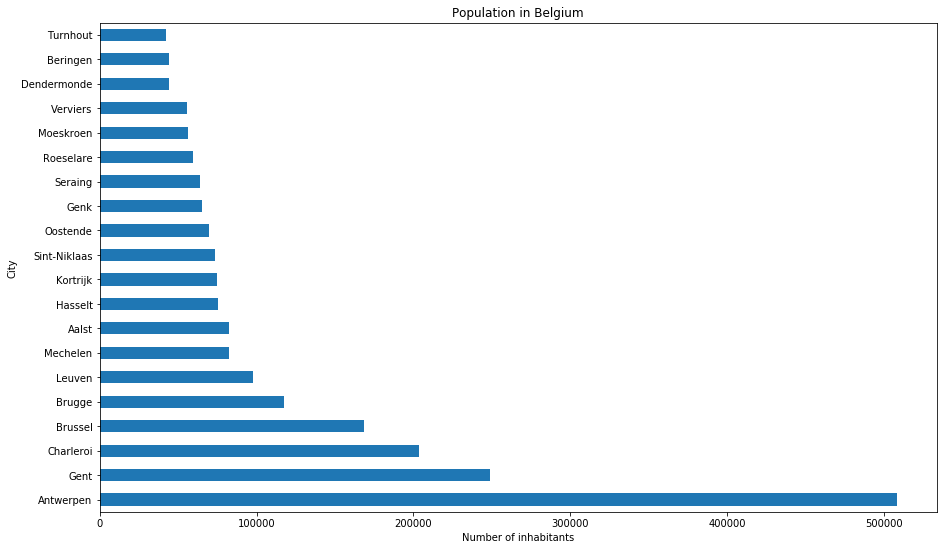

In [26]:
#take a look at the population in those citys 
import matplotlib.pyplot as plt
geo_datanew[['City', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('City') # add y-label to the plot
plt.title('Population in Belgium') # add title to the plot
plt.yticks (np.arange(20), geo_datanew['City'])
plt.show()

In [27]:
# create map of The biggest citys using latitude and longitude values
map_Belgiumtop = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, City, Population in zip(geo_datanew['Latitude'], geo_datanew['Longitude'],geo_datanew['City'], geo_datanew['Population']):
    label = '{}, {}'.format(City, Population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
      radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Belgiumtop)  
    
map_Belgiumtop

In [28]:
map_Belgiumtop.save('map_Belgiumtop.html')


#### As we can see, the biggest citys are in the top part of the country.
#### Lets explore those citys in a range of 2000 m to get the venues with a limit of 100

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
Belgium_venues = getNearbyVenues(names=geo_datanew['City'],
                                   latitudes=geo_datanew['Latitude'],
                                   longitudes=geo_datanew['Longitude']
                                  )

Antwerpen
Gent
Charleroi
Brussel
Brugge
Leuven
Mechelen
Aalst
Hasselt
Kortrijk
Sint-Niklaas
Oostende
Genk


KeyError: 'groups'

#### Let's take a look. the amount of venues that were returned for each City



In [114]:
Belgium_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Aalst,21,21,21,21,21,21
Antwerpen,100,100,100,100,100,100
Beringen,40,40,40,40,40,40
Brugge,100,100,100,100,100,100
Brussel,100,100,100,100,100,100
Charleroi,100,100,100,100,100,100
Dendermonde,100,100,100,100,100,100
Genk,100,100,100,100,100,100
Gent,100,100,100,100,100,100


In [263]:
# find the unique categories value
print('There are {} uniques categories.'.format(len(Belgium_venues['Venue Category'].unique())))


There are 259 uniques categories.


### 5. Analyze Each City


#### Create a new DataFrame for Bars and everything that has something to do with a possibility of drinking beer 
#### Group those features and make a total for every City 



In [ ]:
toronto_grouped =toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

In [129]:

Belgium_bars = Belgium_venues[(Belgium_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Belgium_venues['Venue Category'].str.contains('Cafeteria', regex=False)) |
                 (Belgium_venues['Venue Category'].str.contains('Café', regex=False)) |
                 (Belgium_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (Belgium_venues['Venue Category'].str.contains('Bar', regex=False))].groupby(['City']).count()
Belgium_bars.drop(['City Latitude', 'City Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Belgium_bars.rename(columns = {'Venue Category':'Number of Bars'}, inplace=True)
Belgium_bars = Belgium_bars.reset_index()
Belgium_bars.head()

,City,Number of Bars
0,Aalst,5
1,Antwerpen,38
2,Beringen,7
3,Brugge,44
4,Brussel,32
5,Charleroi,34
6,Dendermonde,30
7,Genk,33
8,Gent,46
9,Hasselt,39


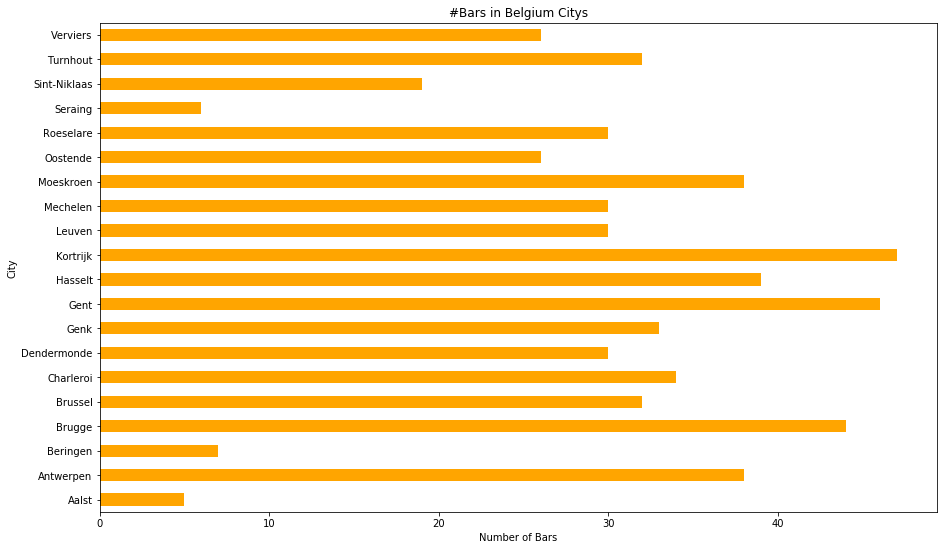

In [132]:
Belgium_bars[['City', 'Number of Bars']].plot(kind='barh', figsize=(15, 9), legend = None , color = 'orange')

plt.xlabel('Number of Bars') # add to x-label to the plot
plt.ylabel('City') # add y-label to the plot
plt.title('#Bars in Belgium Citys') # add title to the plot
plt.yticks (np.arange(20), Belgium_bars['City'])
plt.show()

#### Get the Top 3 citys with Number of Bars

In [120]:
CityWithBar_df= Belgium_bars.nlargest(3, ['Number of Bars'])
CityWithBar_df.head()

,Number of Bars
City,
Kortrijk,47
Gent,46
Brugge,44


In [123]:
Top3City_df = geo_datanew.join(CityWithBar_df, on='City')
Top3City_df = Top3City_df.dropna()
Top3City_df.head()

,postal,City,Latitude,Longitude,Population,Number of Bars
100,9000,Gent,51.067831,3.729091,248813,46.0
79,8000,Brugge,51.209349,3.224701,117577,44.0
85,8500,Kortrijk,50.819489,3.257708,75120,47.0


#### We can now see that Gent has the biggest population of the 3 citys so our we are gonna look into gent to find the best location for our Beer promoting campaign

# Part 2

### 1. Scrape data from the internet and download the needed data
#### This data is uploaded to our github to get easy access

In [32]:
url = 'https://raw.githubusercontent.com/Torrosdopoulos/Coursera_Capstone/master/stadswijken-gent.csv'
Gent_df = pd.read_csv(url,index_col=0 , delimiter=";" )
Gent_df.head()

,naam,wijk,Latitude,Longitude
nieuwnr,,,,
1,Binnenstad,Binnenstad,"51,0477602841","3,72765891938"
24,West,Mariakerke,"51,0741260697","3,76585871261"
15,Oost,Moscou - Vogelhoek,"51,0256748878","3,75871589607"
21,Zuid,Stationsbuurt-Zuid,"51,0302467102","3,70661267376"
20,Zuid,Nieuw Gent - UZ,"51,0207649274","3,72885601604"


#### Clean the dataset 

In [33]:
Gent_df['Latitude']= Gent_df['Latitude'].str.replace(',','.')
Gent_df['Longitude']= Gent_df['Longitude'].str.replace(',','.')
Gent_df.head()

,naam,wijk,Latitude,Longitude
nieuwnr,,,,
1,Binnenstad,Binnenstad,51.0477602841,3.72765891938
24,West,Mariakerke,51.0741260697,3.76585871261
15,Oost,Moscou - Vogelhoek,51.0256748878,3.75871589607
21,Zuid,Stationsbuurt-Zuid,51.0302467102,3.70661267376
20,Zuid,Nieuw Gent - UZ,51.0207649274,3.72885601604


In [34]:
#rename parts of the dataset so english people will understand and drop so
Gent_df.rename(columns={'wijk': 'Neighbourhood'}, inplace=True)
Gent_df = Gent_df.drop(['naam'], axis=1 )
Gent_df=Gent_df.reset_index()
Gent_df = Gent_df.drop(['nieuwnr'], axis=1 )

In [35]:
Gent_df.head()

,Neighbourhood,Latitude,Longitude
0,Binnenstad,51.0477602841,3.72765891938
1,Mariakerke,51.0741260697,3.76585871261
2,Moscou - Vogelhoek,51.0256748878,3.75871589607
3,Stationsbuurt-Zuid,51.0302467102,3.70661267376
4,Nieuw Gent - UZ,51.0207649274,3.72885601604


In [36]:
#Coordinates of Gent City
Glatitude = 51.067831
Glongitude= 3.729091


In [37]:
Gent_df.dtypes

Neighbourhood    object
Latitude         object
Longitude        object
dtype: object

#### Latitude and Longitude need to be of the float type

In [38]:
Gent_df['Latitude'] =Gent_df['Latitude'].astype(float)
Gent_df['Longitude'] =Gent_df['Longitude'].astype(float)

In [39]:
Gent_df.head()

,Neighbourhood,Latitude,Longitude
0,Binnenstad,51.047760,3.727659
1,Mariakerke,51.074126,3.765859
2,Moscou - Vogelhoek,51.025675,3.758716
3,Stationsbuurt-Zuid,51.030247,3.706613
4,Nieuw Gent - UZ,51.020765,3.728856


### 2. Create a map of Gent with neighborhoods superimposed on top


In [40]:
# create map of Gent using latitude and longitude values
map_Gent = folium.Map(location=[Glatitude, Glongitude], zoom_start=12)

# add markers to map
for lat, lng,Neighbourhood in zip(Gent_df['Latitude'],Gent_df['Longitude'],Gent_df['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
      radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#ffcccb',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Gent)  
    
map_Gent

### 3. Use The Foursquare API again to Explore The Neighbourhoods of Gent

In [41]:
#get the top 100 venues that are within a radius of 500 meters.

def getNearbyVenuesgent(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
Gent_venues = getNearbyVenuesgent(names=Gent_df['Neighbourhood'],
                                   latitudes=Gent_df['Latitude'],
                                   longitudes=Gent_df['Longitude']
                                  )

Binnenstad
Mariakerke
Moscou - Vogelhoek
Stationsbuurt-Zuid
Nieuw Gent - UZ
Gentse Kanaaldorpen en -zone
Bloemekenswijk
Wondelgem
Watersportbaan - Ekkergem
Rabot - Blaisantvest
Muide - Meulestede - Afrikalaan
Macharius - Heirnis
Drongen
Ledeberg
Brugse Poort - Rooigem
Dampoort
Sluizeken - Tolhuis - Ham
Elisabethbegijnhof - Prinsenhof - Papegaai - Sint-Michiels
Stationsbuurt-Noord
Sint-Amandsberg
Oostakker
Zwijnaarde
Sint-Denijs-Westrem - Afsnee
Gentbrugge
Oud Gentbrugge


In [43]:
Gent_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Binnenstad,100,100,100,100,100,100
Bloemekenswijk,20,20,20,20,20,20
Brugse Poort - Rooigem,38,38,38,38,38,38
Dampoort,33,33,33,33,33,33
Drongen,6,6,6,6,6,6
Elisabethbegijnhof - Prinsenhof - Papegaai - Sint-Michiels,64,64,64,64,64,64
Gentbrugge,11,11,11,11,11,11
Gentse Kanaaldorpen en -zone,1,1,1,1,1,1
Ledeberg,30,30,30,30,30,30


In [44]:
print('There are {} uniques categories.'.format(len(Gent_venues['Venue Category'].unique())))

There are 204 uniques categories.


#### Create a new DataFrame for Bars and everything that has something to do with a possibility of drinking beer 
#### Group those features and make a total for Gent

In [74]:
Gent_bars = Gent_venues[(Gent_venues['Venue Category'].str.contains('Beer', regex=False)) |
                 (Gent_venues['Venue Category'].str.contains('Cafeteria', regex=False)) |
                 (Gent_venues['Venue Category'].str.contains('Café', regex=False)) |
                 (Gent_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (Gent_venues['Venue Category'].str.contains('Bar', regex=False))].groupby(['Neighbourhood']).count()
Gent_bars.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Gent_bars.rename(columns = {'Venue Category':'Number of Bars'}, inplace=True)
Gent_bars = Gent_bars.reset_index()
Gent_bars.head(20)

,Neighbourhood,Number of Bars
0,Binnenstad,35
1,Bloemekenswijk,1
2,Brugse Poort - Rooigem,4
3,Dampoort,9
4,Elisabethbegijnhof - Prinsenhof - Papegaai - S...,30
5,Gentbrugge,3
6,Ledeberg,6
7,Macharius - Heirnis,7
8,Mariakerke,1
9,Moscou - Vogelhoek,1


### 4. Cluster Neighborhoods


In [75]:

# set number of clusters
kclusters = 5

Gent_clustering = Gent_bars.drop(["Neighbourhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Gent_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([4, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 2],
      dtype=int32)

In [76]:

# merge Gent_bars with Gent_df to add latitude/longitude for each neighborhood
Gent_merged = Gent_bars.join(Gent_df.set_index("Neighbourhood"), on="Neighbourhood")
Gent_merged.head()

,Neighbourhood,Number of Bars,Latitude,Longitude,Cluster Labels
0,Binnenstad,35,51.047760,3.727659,0
1,Bloemekenswijk,1,51.070534,3.706548,0
2,Brugse Poort - Rooigem,4,51.058966,3.691731,0
3,Dampoort,9,51.052336,3.749105,0
4,Elisabethbegijnhof - Prinsenhof - Papegaai - S...,30,51.053335,3.714365,0


In [77]:
Gent_merged["Cluster Labels"] = kmeans.labels_

In [78]:
Gent_merged.head()

,Neighbourhood,Number of Bars,Latitude,Longitude,Cluster Labels
0,Binnenstad,35,51.047760,3.727659,4
1,Bloemekenswijk,1,51.070534,3.706548,2
2,Brugse Poort - Rooigem,4,51.058966,3.691731,2
3,Dampoort,9,51.052336,3.749105,0
4,Elisabethbegijnhof - Prinsenhof - Papegaai - S...,30,51.053335,3.714365,1


### Finally, let's visualize the resulting clusters



In [80]:
# create map
map_clusters = folium.Map(location=[Glatitude, Glongitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster , number in zip(Gent_merged['Latitude'], Gent_merged['Longitude'], Gent_merged['Neighbourhood'], Gent_merged['Cluster Labels'],Gent_merged['Number of Bars']):
    label = folium.Popup(str(poi) + ' - Number of Bars ' + str(number), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [257]:
map_clusters.save('map_clusters.html')


#### Observing the results

Most of the restaurants and pubs are concentrated in the central area of Gent , with the highest number in the orange cluster and moderate number in cluster purple and green. On the other hand, the blue cluster has very low number to totally no beer related venues in the neighbourhoods. To promote our beer we want to start in the area with a lot of pubs and restaurants. We could start in the city center and then promote our beer in the different parts of the city near the purple and green clusters. Those areas will also be good. We need to stay away from the blue areas. There is almost no beer related venues in this area. Therefore, this will not reach the right target group of peoples. Another good idea might be to explore the other candidate city's we had in our top 3: 'Kortrijk' and 'Brugge'. If we could find the neighbourhoods in those city's were beer related venues are, we can make advantage of that. instead of staying in Gent and expand our promoting area in one city, we could move to the most beer related parts of 'Kortrijk' and 'Brugge'. in that way we can reach more different people with the same group of people. Finally , Gent binnenstad is the most attractive neighbourhood to start with our Beer promoting campaign after this analysis of Belgium.